In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [3]:
df = pd.read_csv('../input/bigmart-sales-data/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.Item_Outlet_Sales = df.Item_Outlet_Sales.apply(np.round)

In [5]:
df.Item_Outlet_Sales = df.Item_Outlet_Sales.astype(int)

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [7]:
test = pd.read_csv('../input/bigmart-sales-data/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
Item_identifier = test['Item_Identifier']

In [9]:
df['Item_Identifier'].value_counts()
df['Item_Fat_Content'].value_counts()
df['Item_Type'].value_counts()
df['Outlet_Identifier'].value_counts()
df['Outlet_Size'].value_counts()
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### So 25% of item weight and 42% of Outlet size data is missing.

In [11]:
Categorical = df.select_dtypes(include = [np.object])
print('The categorical data is: ', Categorical.shape[1])

Numerical = df.select_dtypes(include = [np.float64,np.int64])
print('The numerical data is: ', Numerical.shape[1])

The categorical data is:  7
The numerical data is:  5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [12]:
Categorical = test.select_dtypes(include = [np.object])
print('The categorical data is: ', Categorical.shape[1])

Numerical = test.select_dtypes(include = [np.float64,np.int64])
print('The numerical data is: ', Numerical.shape[1])

The categorical data is:  7
The numerical data is:  4


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.293207
std,4.643456,0.051598,62.275067,8.371760,1706.497349
min,4.555000,0.000000,31.290000,1985.000000,33.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.500000
50%,12.600000,0.053931,143.012800,1999.000000,1794.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.000000
max,21.350000,0.328391,266.888400,2009.000000,13087.000000


In [14]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014126
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128624
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567569
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049137
Item_Outlet_Sales,0.014126,-0.128624,0.567569,-0.049137,1.000000


In [15]:
df['Item_Weight'].isnull().sum()

1463

### filling the missing values of item weight with mean 

In [16]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [17]:
df.Item_Weight.isnull().sum()

0

#### So we have removed null item weights and filled them with mean values.

In [18]:
df['Outlet_Size'].isnull().sum()

2410

In [19]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [22]:
df['Outlet_Size'].isnull().sum()

0

In [23]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## The missing values have all been put in

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [25]:
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [26]:
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995,35


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

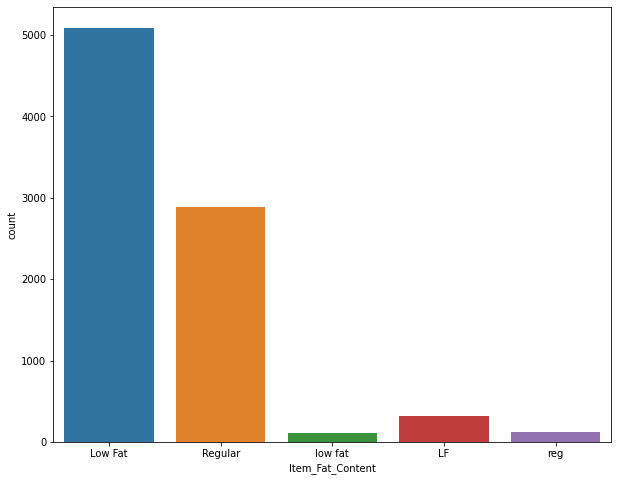

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['Item_Fat_Content'])

# Relation Item Type Vs MRP

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

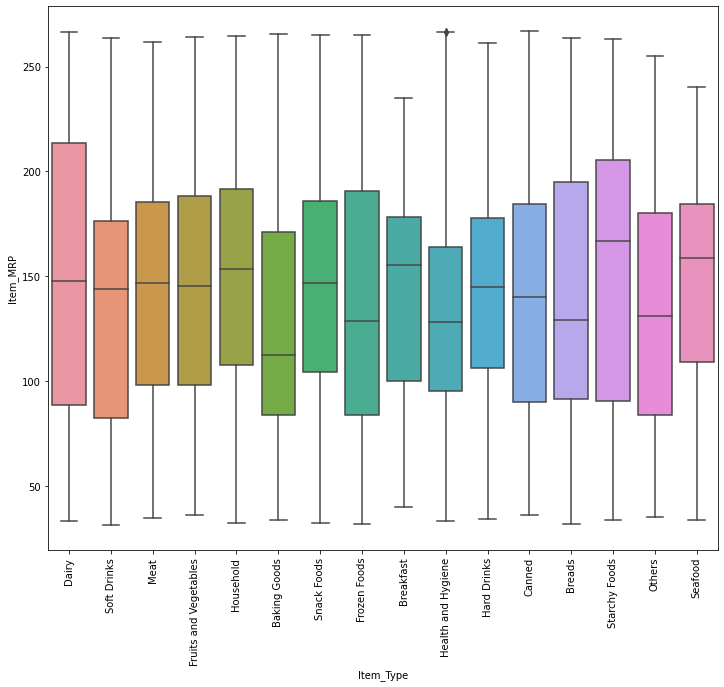

In [29]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.boxplot(x = df['Item_Type'], y = df['Item_MRP'],data = df)

## Relation MRP Vs Sales

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

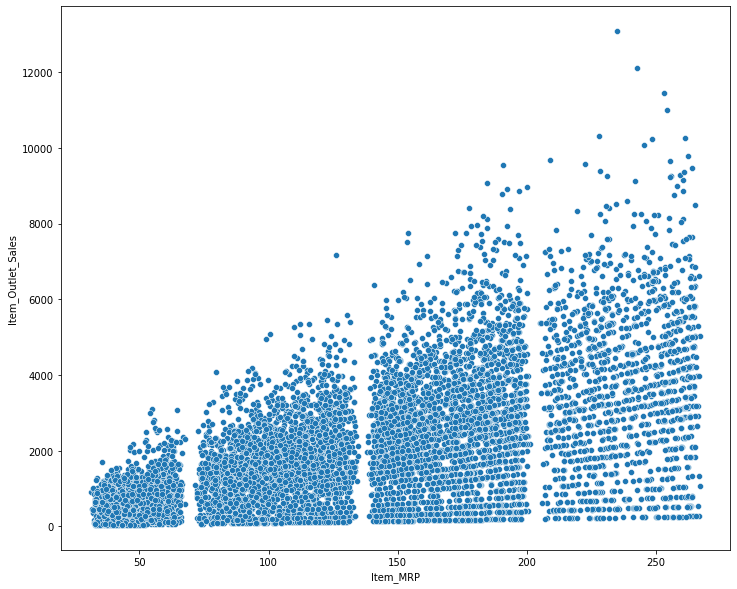

In [30]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'], data = df)

In [31]:
plt.figure(figsize=(12,10))
px.bar(x = df['Item_Type'], y = df['Item_MRP'],data_frame = df)

<Figure size 864x720 with 0 Axes>

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995,35


# Creating dummy Variables for Categorical data types and removing data that can't be used in the model.

In [33]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [35]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [36]:
df = df.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'], axis = 1)

In [37]:
test = test.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'], axis = 1)

In [38]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735,23
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443,13
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097,23
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732,24
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,995,35


In [39]:
df['Item_Type'] = df['Item_Type'].astype('category')
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')
df['Outlet_Size'] = df['Outlet_Size'].astype('category')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')
df['Outlet_Type'] = df['Outlet_Type'].astype('category')

In [40]:
test['Item_Type'] = test['Item_Type'].astype('category')
test['Item_Fat_Content'] = test['Item_Fat_Content'].astype('category')
test['Outlet_Size'] = test['Outlet_Size'].astype('category')
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].astype('category')
test['Outlet_Type'] = test['Outlet_Type'].astype('category')

In [41]:
df['Item_Type'] = df['Item_Type'].cat.codes
df['Item_Fat_Content'] = df['Item_Fat_Content'].cat.codes
df['Outlet_Size'] = df['Outlet_Size'].cat.codes
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].cat.codes
df['Outlet_Type'] = df['Outlet_Type'].cat.codes

In [42]:
test['Item_Type'] = test['Item_Type'].cat.codes
test['Item_Fat_Content'] = test['Item_Fat_Content'].cat.codes
test['Outlet_Size'] = test['Outlet_Size'].cat.codes
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].cat.codes
test['Outlet_Type'] = test['Outlet_Type'].cat.codes

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           4705 non-null   float64
 1   Item_Fat_Content      5681 non-null   int8   
 2   Item_Visibility       5681 non-null   float64
 3   Item_Type             5681 non-null   int8   
 4   Item_MRP              5681 non-null   float64
 5   Outlet_Size           5681 non-null   int8   
 6   Outlet_Location_Type  5681 non-null   int8   
 7   Outlet_Type           5681 non-null   int8   
 8   Years_Established     5681 non-null   int64  
dtypes: float64(3), int64(1), int8(5)
memory usage: 205.4 KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int8   
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int8   
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int8   
 6   Outlet_Location_Type  8523 non-null   int8   
 7   Outlet_Type           8523 non-null   int8   
 8   Item_Outlet_Sales     8523 non-null   int64  
 9   Years_Established     8523 non-null   int64  
dtypes: float64(3), int64(2), int8(5)
memory usage: 374.7 KB


In [45]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,1,0.016047,4,249.8092,1,0,1,3735,23
1,5.92,2,0.019278,14,48.2692,1,2,2,443,13
2,17.50,1,0.016760,10,141.6180,1,0,1,2097,23
3,19.20,2,0.000000,6,182.0950,1,2,0,732,24
4,8.93,1,0.000000,9,53.8614,0,2,1,995,35


In [46]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750,1,0.007565,13,107.8622,1,0,1,23
1,8.300,4,0.038428,4,87.3198,-1,1,1,15
2,14.600,1,0.099575,11,241.7538,-1,2,0,24
3,7.315,1,0.015388,13,155.0340,-1,1,1,15
4,NaN,2,0.118599,4,234.2300,1,2,3,37


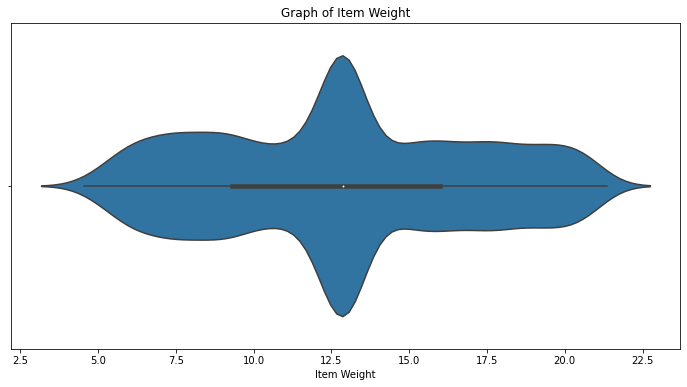

In [47]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df.Item_Weight,bins=30)
plt.xlabel('Item Weight')
plt.title('Graph of Item Weight')
plt.show()

<AxesSubplot:>

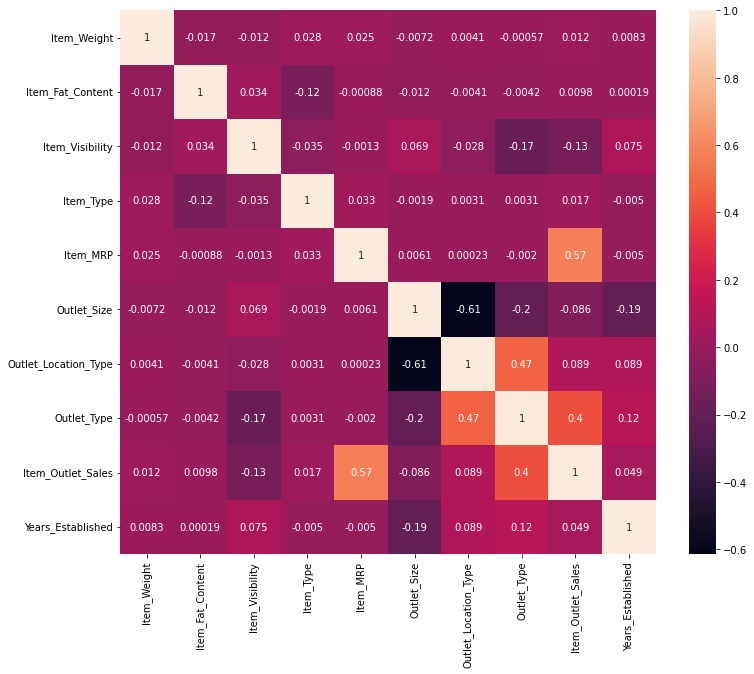

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)

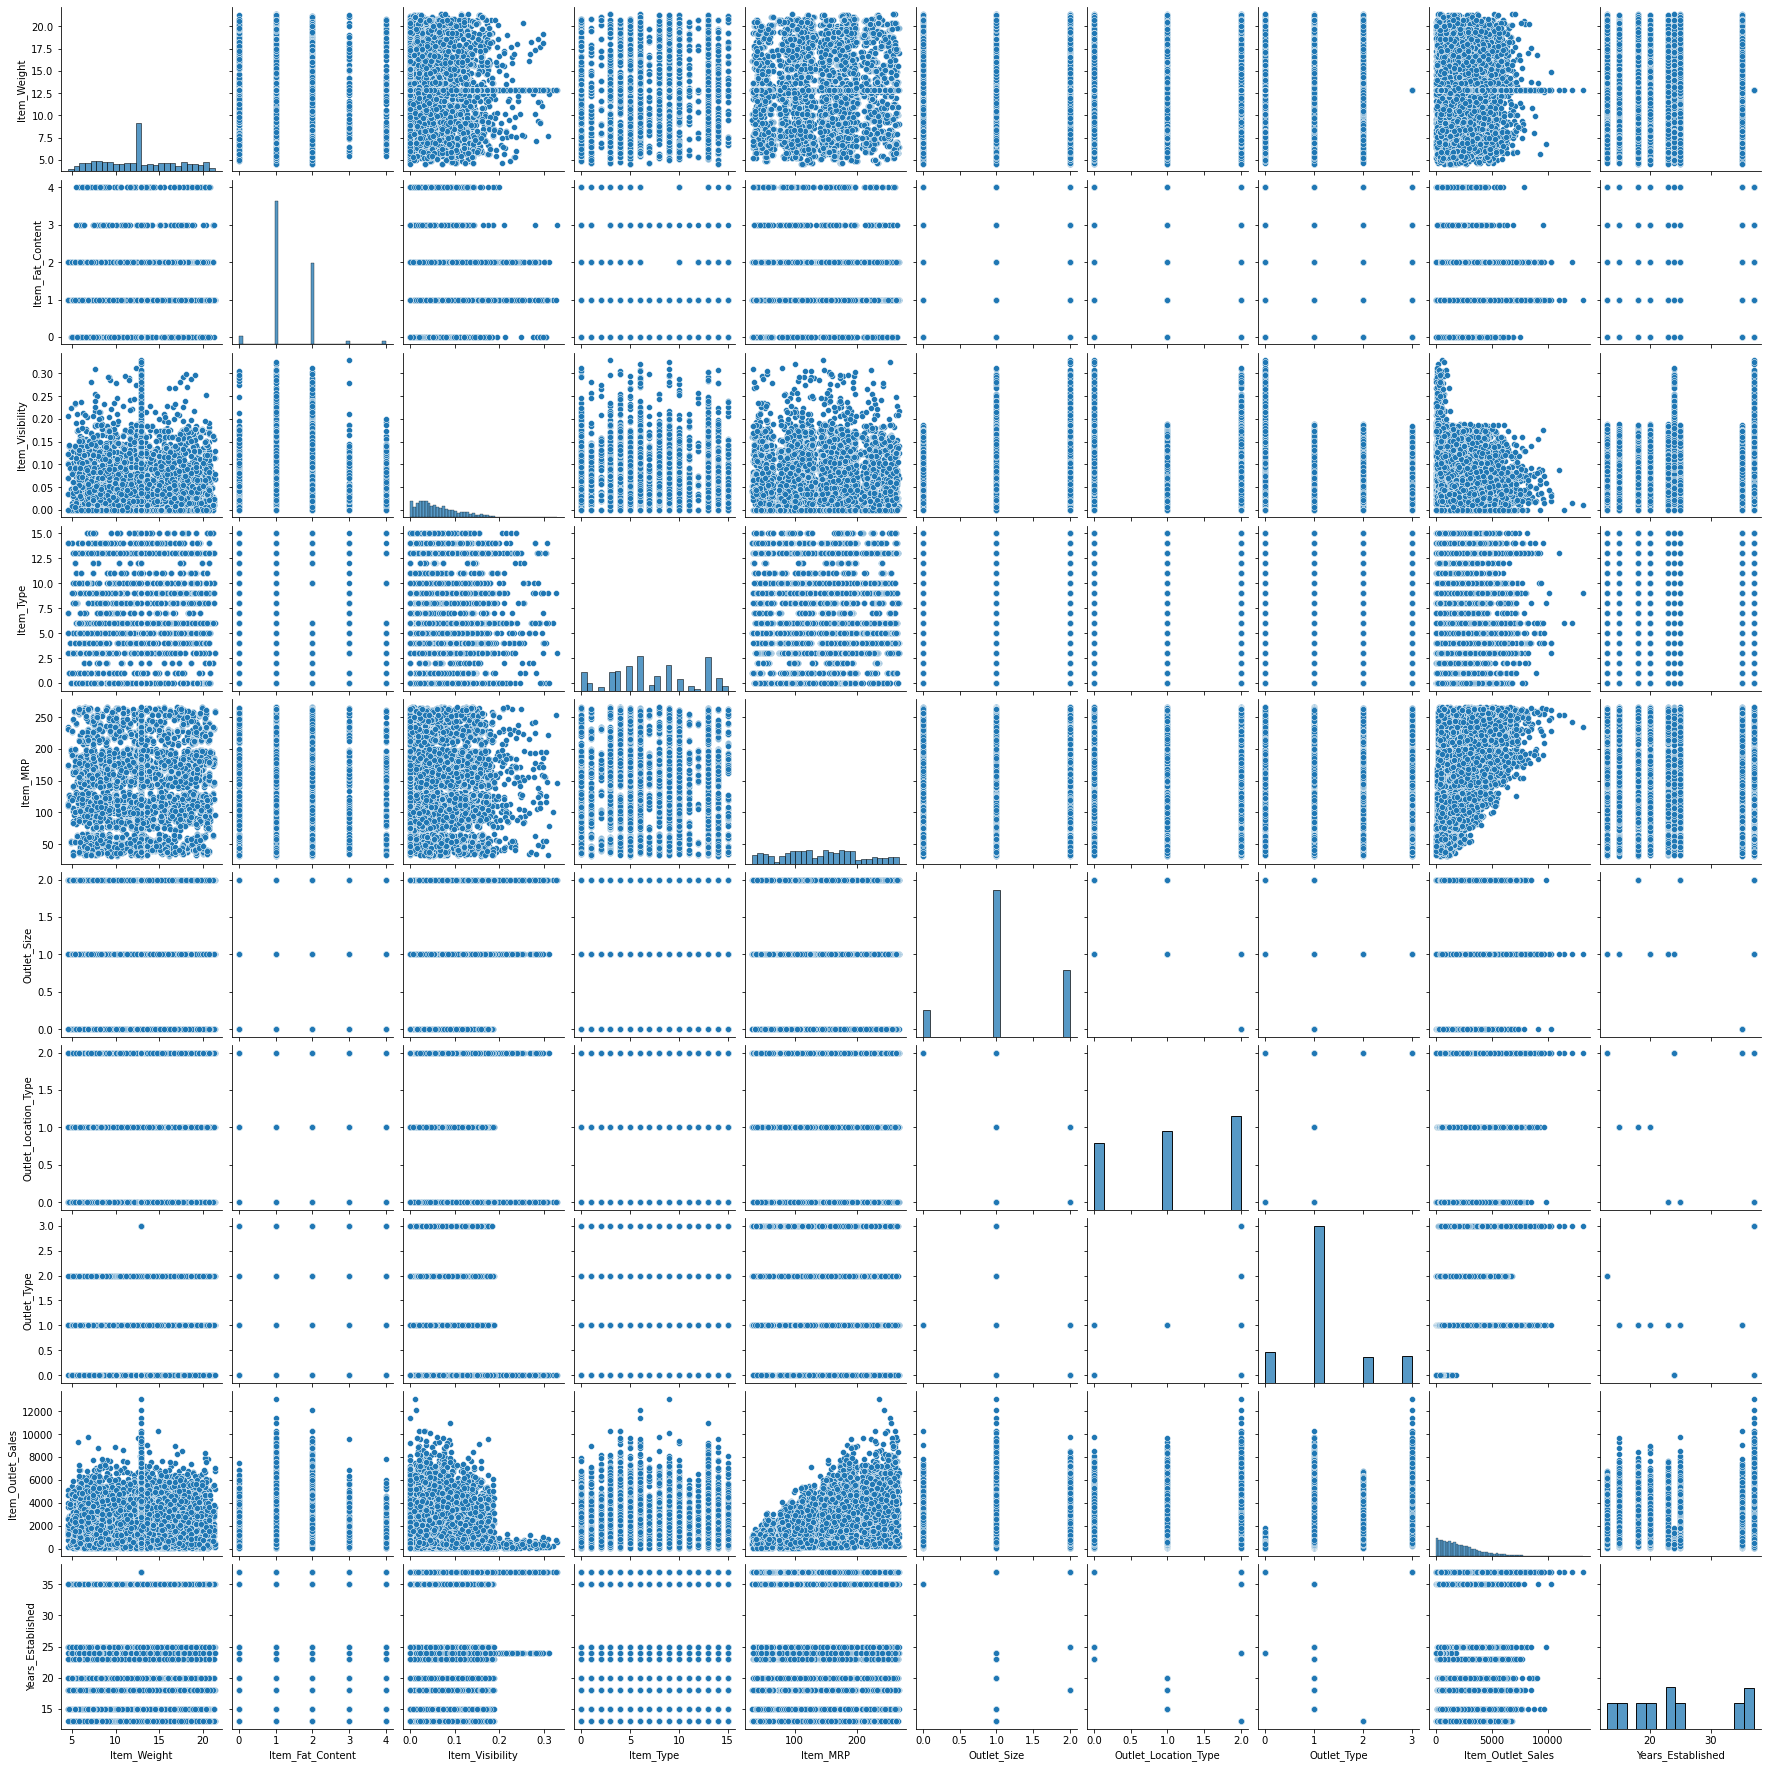

In [49]:
sns.pairplot(df)

# Standardizing the data

In [50]:
X = df.drop('Item_Outlet_Sales',axis = 1)

In [51]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.300,1,0.016047,4,249.8092,1,0,1,23
1,5.920,2,0.019278,14,48.2692,1,2,2,13
2,17.500,1,0.016760,10,141.6180,1,0,1,23
3,19.200,2,0.000000,6,182.0950,1,2,0,24
4,8.930,1,0.000000,9,53.8614,0,2,1,35
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,35
8519,8.380,2,0.046982,0,108.1570,1,1,1,20
8520,10.600,1,0.035186,8,85.1224,2,1,1,18
8521,7.210,2,0.145221,13,103.1332,1,2,2,13


In [52]:
y = df['Item_Outlet_Sales']


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-1.03758831, -0.56316394, -0.75967564, ..., -0.14015476,
        -0.25217935, -0.73970749],
       [-0.73344661, -0.56316394,  1.64234262, ...,  1.08769153,
        -1.50280447, -0.02526765],
       [ 0.82290346, -0.56316394, -1.28220131, ..., -0.14015476,
        -0.25217935, -0.73970749],
       ...,
       [-1.38093577, -0.56316394, -0.84566511, ..., -1.36800105,
        -0.25217935, -0.14434096],
       [ 1.11991684,  0.98372191, -0.25087925, ...,  1.08769153,
         0.99844577, -1.33507403],
       [-1.27995122, -0.56316394, -1.28220131, ..., -1.36800105,
        -0.25217935, -0.14434096]])

In [59]:
y_test

2042    3092
4378    6478
4118    3090
4835    4027
4129    3216
        ... 
4822    3176
879     1156
5436     767
2785    2816
1738     469
Name: Item_Outlet_Sales, Length: 2557, dtype: int64

# Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
LR = LinearRegression()

In [62]:
LR.fit(X_train,y_train)

LinearRegression()

In [63]:
LR.intercept_

2168.588669125042

In [64]:
LR.coef_

array([-5.41030321e+00,  2.10452455e+01, -7.88826530e+01, -6.66007841e+00,
        9.91808376e+02, -2.13724712e+02, -3.49662926e+02,  7.83136359e+02,
        3.90172418e-01])

## Prediction

In [65]:
predict = LR.predict(X_test)

In [66]:
predict

array([2142.74961988, 4213.09128313, 4204.21645471, ...,  441.09748026,
       2847.7314034 ,  669.525156  ])

Text(0, 0.5, 'x_test')

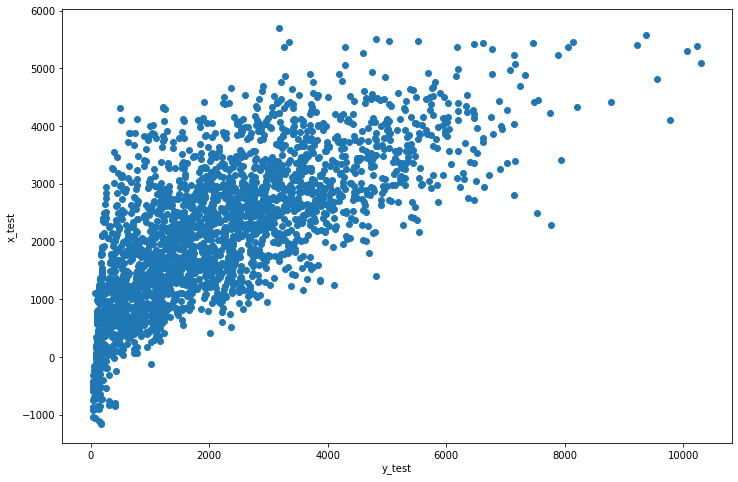

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(x= y_test,y = predict)
plt.xlabel('y_test')
plt.ylabel('x_test')

# Deep Learning Model 

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
X_test.shape

(2557, 9)

In [70]:
X_train.shape

(5966, 9)

In [71]:
model = Sequential()

model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2022-04-21 10:52:02.880752: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [72]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size = 128, epochs = 400)

2022-04-21 10:52:03.504456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
47/47 [==============================] - 1s 7ms/step - loss: 7665294.5000 - val_loss: 7674450.5000
Epoch 2/400
47/47 [==============================] - 0s 5ms/step - loss: 7659874.5000 - val_loss: 7664372.0000
Epoch 3/400
47/47 [==============================] - 0s 4ms/step - loss: 7639850.0000 - val_loss: 7626481.5000
Epoch 4/400
47/47 [==============================] - 0s 4ms/step - loss: 7568009.0000 - val_loss: 7497360.5000
Epoch 5/400
47/47 [==============================] - 0s 4ms/step - loss: 7346995.0000 - val_loss: 7136331.5000
Epoch 6/400
47/47 [==============================] - 0s 4ms/step - loss: 6793551.0000 - val_loss: 6320880.0000
Epoch 7/400
47/47 [==============================] - 0s 4ms/step - loss: 5723279.5000 - val_loss: 4928823.0000
Epoch 8/400
47/47 [==============================] - 0s 5ms/step - loss: 4197945.0000 - val_loss: 3313151.0000
Epoch 9/400
47/47 [==============================] - 0s 4ms/step - loss: 2830641.0000 - val_loss: 2241596.5000
E

In [73]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,7665294.5,7674450.5
1,7659874.5,7664372.0
2,7639850.0,7626481.5
3,7568009.0,7497360.5
4,7346995.0,7136331.5


<AxesSubplot:>

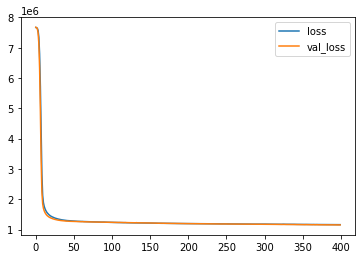

In [74]:
losses.plot()

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score


In [76]:
predictions = model.predict(X_test)

In [77]:
mean_squared_error(y_test,predictions)

1152928.3028838357

In [78]:
mean_squared_error(y_test,predictions)**0.5

1073.7449896897474

In [79]:
np.sqrt(mean_squared_error(y_test,predictions))


1073.7449896897474

In [80]:
mean_absolute_error(y_test,predictions)


767.525855185606

Text(0, 0.5, 'predictions')

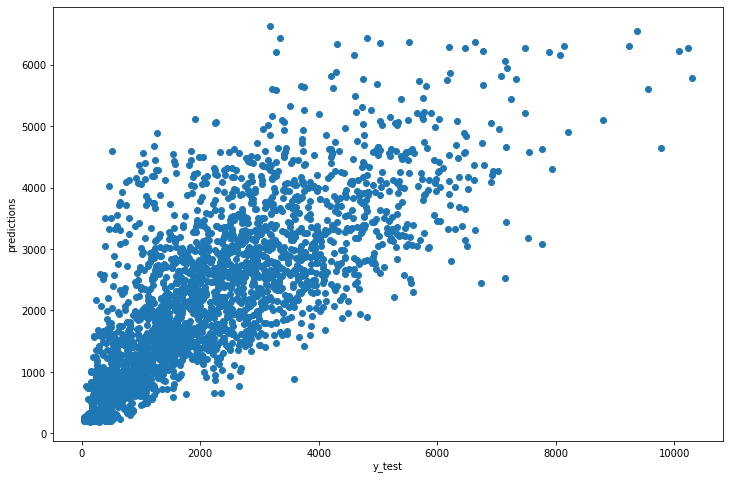

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [82]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.293207
std       1706.497349
min         33.000000
25%        834.500000
50%       1794.000000
75%       3101.000000
max      13087.000000
Name: Item_Outlet_Sales, dtype: float64

In [83]:
explained_variance_score(y_test,predictions)


0.5867089984874896

Text(0, 0.5, 'predictions')

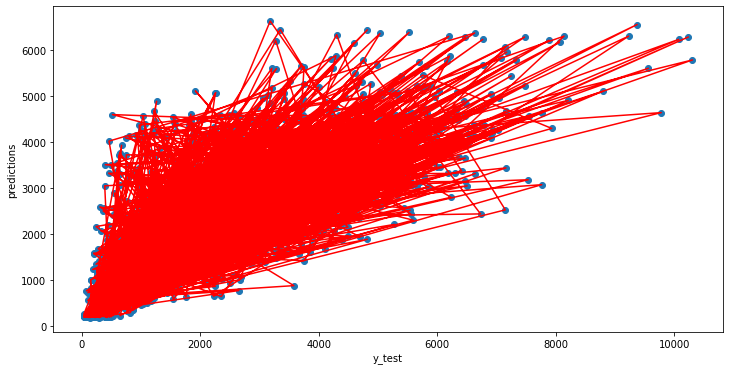

In [84]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,predictions,'r')
plt.xlabel('y_test')
plt.ylabel('predictions')

In [85]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,1,0.016047,4,249.8092,1,0,1,3735,23
1,5.92,2,0.019278,14,48.2692,1,2,2,443,13
2,17.50,1,0.016760,10,141.6180,1,0,1,2097,23
3,19.20,2,0.000000,6,182.0950,1,2,0,732,24
4,8.93,1,0.000000,9,53.8614,0,2,1,995,35


## Test Prediction on a single outlet sales

In [86]:
single_prediction = df.drop('Item_Outlet_Sales', axis=1).iloc[2]

In [87]:
single_prediction

Item_Weight              17.50000
Item_Fat_Content          1.00000
Item_Visibility           0.01676
Item_Type                10.00000
Item_MRP                141.61800
Outlet_Size               1.00000
Outlet_Location_Type      0.00000
Outlet_Type               1.00000
Years_Established        23.00000
Name: 2, dtype: float64

In [88]:
single_prediction = scaler.transform(single_prediction.values.reshape(-3,9))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [89]:
single_prediction

array([[ 1.09615577, -0.56316394, -0.95849722,  0.65468   ,  0.02160658,
        -0.28275251, -1.36800105, -0.25217935, -0.14434096]])

In [90]:
model.predict(single_prediction)

array([[2284.5183]], dtype=float32)

In [91]:
df.iloc[2]

Item_Weight               17.50000
Item_Fat_Content           1.00000
Item_Visibility            0.01676
Item_Type                 10.00000
Item_MRP                 141.61800
Outlet_Size                1.00000
Outlet_Location_Type       0.00000
Outlet_Type                1.00000
Item_Outlet_Sales       2097.00000
Years_Established         23.00000
Name: 2, dtype: float64

# Test prediction of the whole test dataset

In [92]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750,1,0.007565,13,107.8622,1,0,1,23
1,8.300,4,0.038428,4,87.3198,-1,1,1,15
2,14.600,1,0.099575,11,241.7538,-1,2,0,24
3,7.315,1,0.015388,13,155.0340,-1,1,1,15
4,NaN,2,0.118599,4,234.2300,1,2,3,37


In [93]:
test_predictions = scaler.transform(test)

In [94]:
test_predictions

array([[ 1.86839054, -0.56316394, -1.13609407, ..., -1.36800105,
        -0.25217935, -0.14434096],
       [-1.08986266,  4.0774936 , -0.54000916, ..., -0.14015476,
        -0.25217935, -1.09692741],
       [ 0.40708474, -0.56316394,  0.64098847, ...,  1.08769153,
        -1.50280447, -0.02526765],
       ...,
       [-0.68592447, -0.56316394,  0.13792932, ..., -0.14015476,
        -0.25217935, -0.50156088],
       [ 0.57341223,  0.98372191, -1.28220131, ..., -0.14015476,
        -0.25217935, -1.09692741],
       [-0.80472982,  0.98372191,  0.74036369, ..., -0.14015476,
        -0.25217935, -0.50156088]])

In [95]:
test_predictions = model.predict(test_predictions)

In [96]:
test_predictions

array([[1740.7627],
       [1882.4985],
       [3327.7559],
       ...,
       [2900.9668],
       [4419.2686],
       [2008.6584]], dtype=float32)

In [97]:
submission = pd.DataFrame()

submission['ID'] = Item_identifier
submission['Sales Predictions'] = pd.Series(test_predictions.reshape(5681,))

submission.head()

,ID,Sales Predictions
0,FDW58,1740.762695
1,FDW14,1882.498535
2,NCN55,3327.755859
3,FDQ58,3164.678223
4,FDY38,257.277618


In [98]:
submission.to_csv("Prashant_Submission.csv", index=False)

In [99]:
submission = pd.read_csv('Prashant_Submission.csv')

In [100]:
submission

,ID,Sales Predictions
0,FDW58,1740.76270
1,FDW14,1882.49850
2,NCN55,3327.75590
3,FDQ58,3164.67820
4,FDY38,257.27762
...,...,...
5676,FDB58,2306.84160
5677,FDD47,2428.72070
5678,NCO17,2900.96680
5679,FDJ26,4419.26860
